# Übung 02 - Return of the Penguins

### <span style="color:CornflowerBlue">Speichern Sie die Übung in dem Ordner 02-Uebung in Ihrem Git.</span>
In dieser Aufgabe verwenden Sie die logistische Regression um Pinguinarten zu klassifizieren. Das Ziel der Übung ist es den kompletten Machine-Learning-Workflow anzuwenden. Dies beinhaltet das Einlesen der Daten, die Handhabung von fehlenden Werten, die Aufteilung in Trainings- und Testdaten, Skalierung der Daten sowie das Trainieren und Evaluiern der logistischen Regression.



In [1]:
# Liste der imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## Aufgabe 1 - Klassifikation

a) Lesen Sie den Datensatz als pandas DataFrame ein und geben Sie die ersten 5 Zeilen aus.

In [2]:
df = pd.read_csv("penguins.csv")
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


b) Entfernen Sie die Zeilen mit fehlenden Werten.

In [3]:
df = df.dropna()

c) Wählen Sie die Merkmale (Spalten) aus auf denen die logistische Regression trainiert werden soll (alle "numerischen" Features). Unterteilen Sie den Datensatz in Features X und  Zielvariable y.

In [4]:
# X = SequentialFeatureSelector(estimator=df, n_features_to_select=2)
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['species']       # Wahl zwischen 'sex', 'island' und 'species'

d) Teilen Sie den Datensatz in Trainings- und Testdaten auf. Verhältnis: 70% Trainingsdaten zu 30% Testdaten

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

e) Trainieren Sie einen sklearn SGDClassifier für logistische Regression auf den Trainingsdaten.

<span style="color:Red">Nicht die Parameter modifizieren!!!</span>

In [6]:
clf = SGDClassifier(loss="log_loss", random_state=42)
clf.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

f) Testen Sie den Klassifikator auf den Testdaten. Wie gut ist die Klassifikation auf den Testdaten? Berechnen Sie dafür die Genauigkeit (accuracy).

Formel für die Genaugkeit (accuracy):

$$accuracy=\frac{\#Korrekte\ Klassifizierungen}{\#Klassifizierungen}$$

In [7]:
y_pred_test = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

g) Leidet Ihr Klassifikator an Over- oder Underfitting?

In [8]:
y_pred_train = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Genauigkeit der Trainingsdaten: {train_accuracy: .2f}")
print(f"Genauigkeit der Testdaten:  {test_accuracy: .2f}")

print("Underfitting")
    # Training sehr gut aber testing schlecht = Overfiting
    # Training und test ist ungefähr gleich schlecht = Underfitting


Genauigkeit der Trainingsdaten:  0.45
Genauigkeit der Testdaten:   0.42
Underfitting


h) Geben Sie die Konfusionsmatrix für die Klassifikation der Testdaten aus.

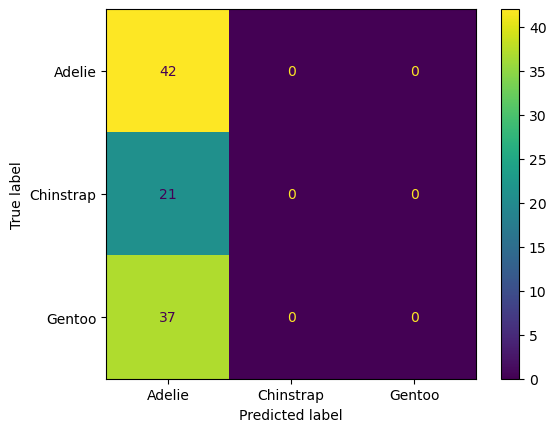

In [9]:
cm = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
cm_display.plot()
plt.show()

## Aufgabe 2 - Logistische Regression mit Skalierung

a) Skalieren und / oder Normalisieren Sie die Daten.

In [10]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)

b) Teilen Sie den Datensatz in Trainings- und Testdaten auf. Verhältnis: 80% Trainingsdaten zu 20% Testdaten.

In [11]:
T_train, T_test, u_train, u_test = train_test_split(df_scaled, y, test_size=0.2, random_state=2)

c) Trainieren Sie den Klassifikator auf den skalierten Daten. Verwenden Sie zusätzlich Early-stopping mit 20% der Trainingsdaten als Validierungsdaten und brechen Sie das Training ab wenn der Validierungsfehler sich 10 Iterationen lang nicht verbessert.

In [12]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log_loss",
                    random_state=42,
                    early_stopping=True,
                    validation_fraction=0.2,
                    n_iter_no_change=10,
                    )

clf.fit(T_train, u_train)

SGDClassifier(early_stopping=True, loss='log_loss', n_iter_no_change=10,
              random_state=42, validation_fraction=0.2)

c) Berechnen Sie die Genauigkeit (accuracy) auf den Testdaten.

In [13]:
u_pred_test = clf.predict(T_test)
test_accuracy = accuracy_score(u_test, u_pred_test)

u_pred_train = clf.predict(T_train)
train_accuracy = accuracy_score(u_train, u_pred_train)

print(f"Genauigkeit der Trainingsdaten: {train_accuracy: .2f}")
print(f"Genauigkeit der Testdaten:  {test_accuracy: .2f}")

Genauigkeit der Trainingsdaten:  0.99
Genauigkeit der Testdaten:   0.99


d) Geben Sie die Konfusionsmatrix für die Klassifikation der Testdaten aus.

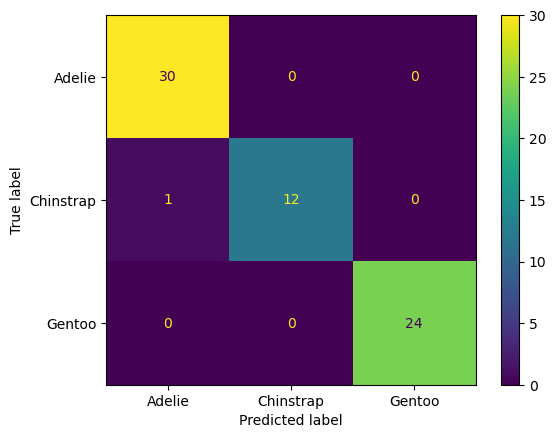

In [14]:
cm = confusion_matrix(u_test, u_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

cm_display.plot()
plt.show()